In [1]:
import gzip
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from collections import Counter
import seaborn as sns 
from matplotlib.ticker import StrMethodFormatter



In [36]:
data_complete = pd.read_csv('ny_listing_2018.csv.gz')
data_complete.fillna(0, inplace=True)

# price = data_complete['price']
# prices=[]

# for p in price:
#     p=float(p[1:].replace(',',''))
#     prices.append(p)

# data_complete['price']=prices

data_complete = pd.DataFrame(data_complete)
data_complete

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20181206022948,2018-12-06,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,0,...,f,0,0,f,f,strict_14_with_grace_period,f,f,3,1.42
1,21456,https://www.airbnb.com/rooms/21456,20181206022948,2018-12-06,Light-filled classic Central Park,"An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...",none,"Diverse. Great coffee shops and restaurants, n...",...,f,0,0,f,f,moderate,t,t,1,0.72
2,2539,https://www.airbnb.com/rooms/2539,20181206022948,2018-12-06,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,0,0,f,f,moderate,f,f,8,0.25
3,2595,https://www.airbnb.com/rooms/2595,20181206022948,2018-12-06,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,0,0,f,f,strict_14_with_grace_period,t,t,2,0.37
4,21644,https://www.airbnb.com/rooms/21644,20181206022948,2018-12-06,"Upper Manhattan, New York",A great space in a beautiful neighborhood- min...,Nice room in a spacious pre-war apartment in u...,A great space in a beautiful neighborhood- min...,none,I love that the neighborhood is safe to walk a...,...,f,0,0,f,f,strict_14_with_grace_period,f,f,1,0.51
5,3330,https://www.airbnb.com/rooms/3330,20181206022948,2018-12-06,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,...,f,0,0,f,f,strict_14_with_grace_period,f,f,3,0.35
6,21794,https://www.airbnb.com/rooms/21794,20181206022948,2018-12-06,COZY QUIET room 4 DOOGLERS!,"It's comfy & has a loft bed & a chaise lounge,...",This is the smaller room of the two I have ava...,"It's comfy & has a loft bed & a chaise lounge,...",none,GREAT Central Location. On 15th street between...,...,f,0,0,f,f,strict_14_with_grace_period,f,f,2,0.25
7,3647,https://www.airbnb.com/rooms/3647,20181206022948,2018-12-06,THE VILLAGE OF HARLEM....NEW YORK !,0,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,0,...,f,0,0,f,f,strict_14_with_grace_period,t,t,1,0.00
8,22911,https://www.airbnb.com/rooms/22911,20181206022948,2018-12-06,The Stuydio Modern and Light Filled,"Make your NY story in our welcoming, home away...",Welcome to The Stuydio! As featured in The New...,"Make your NY story in our welcoming, home away...",none,"Beautiful and historic, our neighborhood has a...",...,f,0,0,t,f,strict_14_with_grace_period,t,t,3,1.32
9,22918,https://www.airbnb.com/rooms/22918,20181206022948,2018-12-06,loft bed - near transportation-15min to times sq,very close to public transportation and quick ...,"i have a small, clean room i am renting in a b...",very close to public transportation and quick ...,none,i'm located between 2 big avenues with public ...,...,f,0,0,t,f,moderate,f,f,3,1.82


In [37]:
# for col in data_complete.columns: 
#     print(col)

data_complete['neighbourhood_group_cleansed'].value_counts()

Manhattan        22564
Brooklyn         19970
Queens            5274
Bronx              928
Staten Island      320
Name: neighbourhood_group_cleansed, dtype: int64

In [38]:
#Replace NaN 
data_complete.loc[data_complete['reviews_per_month'].isnull(),'reviews_per_month']=0
data_complete.loc[data_complete['square_feet'].isnull(),'square_feet']=0
data_complete.loc[data_complete['review_scores_rating'].isnull(),'review_scores_rating']=0
data_complete.loc[data_complete['review_scores_value'].isnull(),'review_scores_value']=0
data_complete.loc[data_complete['neighbourhood'].isnull(),'neighbourhood']='Not Specified'
data_complete.loc[data_complete['bathrooms'].isnull(),'bathrooms']='Not Specified'
data_complete.loc[data_complete['beds'].isnull(),'beds']='Not Specified'

In [39]:
#Create a df from columns need for analysis
NYC_listing_df = data_complete[['host_id','host_is_superhost',
                                'neighbourhood','city','state','property_type',
                                'room_type','accommodates','bathrooms','bedrooms','neighbourhood_group_cleansed',
                                'beds','bed_type','amenities','square_feet','price','host_total_listings_count',
                               'availability_30', 'availability_60','availability_90', 'availability_365',
                               'number_of_reviews', 'review_scores_rating', 'review_scores_value']]
NYC_listing_df

,host_id,host_is_superhost,neighbourhood,city,state,property_type,room_type,accommodates,bathrooms,bedrooms,...,square_feet,price,host_total_listings_count,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_value
0,2758,t,Harlem,New York,NY,Apartment,Private room,3,1,1.0,...,0.0,$59.00,3.0,3,12,23,298,175,93.0,9.0
1,42032,f,Upper West Side,New York,NY,Apartment,Entire home/apt,2,1,1.0,...,0.0,$140.00,1.0,8,8,13,248,76,94.0,10.0
2,2787,t,Kensington,Brooklyn,NY,Apartment,Private room,4,1,1.0,...,0.0,$149.00,8.0,30,60,90,365,9,98.0,10.0
3,2845,f,Midtown,New York,NY,Apartment,Entire home/apt,2,1,0.0,...,0.0,$225.00,5.0,15,45,75,350,41,95.0,9.0
4,82685,f,Hamilton Heights,New York,NY,Apartment,Private room,1,1,1.0,...,0.0,$89.00,1.0,30,60,90,365,1,100.0,8.0
5,4177,f,Williamsburg,Brooklyn,NY,Apartment,Private room,2,1,1.0,...,0.0,$70.00,4.0,11,12,12,216,38,98.0,10.0
6,83257,t,Meatpacking District,New York,NY,Apartment,Private room,2,1,1.0,...,220.0,$111.00,2.0,24,54,84,359,26,99.0,10.0
7,4632,f,Harlem,New York,NY,Apartment,Private room,2,1,1.0,...,0.0,$150.00,1.0,30,60,90,365,0,0.0,0.0
8,87773,f,0,Brooklyn,NY,Apartment,Entire home/apt,4,1,1.0,...,0.0,$125.00,4.0,0,2,2,250,140,92.0,9.0
9,32294,f,0,New York,NY,Apartment,Private room,2,1,1.0,...,0.0,$60.00,3.0,0,0,0,5,10,82.0,8.0


In [40]:
# df.Num_of_employees = df.Num_of_employees.replace({"10-Jan": "1-10",
#                                                    "Nov-50": "11-50"})

NYC_listing_df = NYC_listing_df.replace({"Brooklyn ": "Brooklyn",
                                        'NY': "New York",
                                        'Wadsworth Terrace, Manhattan, New York':'Wadsworth Terrace'})
NYC_listing_df

,host_id,host_is_superhost,neighbourhood,city,state,property_type,room_type,accommodates,bathrooms,bedrooms,...,square_feet,price,host_total_listings_count,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_value
0,2758,t,Harlem,New York,New York,Apartment,Private room,3,1.0,1.0,...,0.0,$59.00,3.0,3,12,23,298,175,93.0,9.0
1,42032,f,Upper West Side,New York,New York,Apartment,Entire home/apt,2,1.0,1.0,...,0.0,$140.00,1.0,8,8,13,248,76,94.0,10.0
2,2787,t,Kensington,Brooklyn,New York,Apartment,Private room,4,1.0,1.0,...,0.0,$149.00,8.0,30,60,90,365,9,98.0,10.0
3,2845,f,Midtown,New York,New York,Apartment,Entire home/apt,2,1.0,0.0,...,0.0,$225.00,5.0,15,45,75,350,41,95.0,9.0
4,82685,f,Hamilton Heights,New York,New York,Apartment,Private room,1,1.0,1.0,...,0.0,$89.00,1.0,30,60,90,365,1,100.0,8.0
5,4177,f,Williamsburg,Brooklyn,New York,Apartment,Private room,2,1.0,1.0,...,0.0,$70.00,4.0,11,12,12,216,38,98.0,10.0
6,83257,t,Meatpacking District,New York,New York,Apartment,Private room,2,1.0,1.0,...,220.0,$111.00,2.0,24,54,84,359,26,99.0,10.0
7,4632,f,Harlem,New York,New York,Apartment,Private room,2,1.0,1.0,...,0.0,$150.00,1.0,30,60,90,365,0,0.0,0.0
8,87773,f,0,Brooklyn,New York,Apartment,Entire home/apt,4,1.0,1.0,...,0.0,$125.00,4.0,0,2,2,250,140,92.0,9.0
9,32294,f,0,New York,New York,Apartment,Private room,2,1.0,1.0,...,0.0,$60.00,3.0,0,0,0,5,10,82.0,8.0


In [41]:
NYC_listing_df = NYC_listing_df.rename(columns={"host_id": "Host ID",
                                             "host_is_superhost": "Host Is Superhost",
                                             "neighbourhood": "Neighbourhood",
                                             "city": "City",
                                              "state": "State",
                                             "property_type": "Property Type",
                                             "room_type": "Room Type",
                                              "accommodates": "Accomodates",
                                              "bathrooms": "Bathrooms",
                                              "bedrooms": "Bedrooms",
                                             "bed_type": "Bed Type",
                                             "amenities": "Amenities",
                                             "square_feet": "Square Feet",
                                             "host_total_listings_count": "Host Total Listings Count",
                                             "availability_30": "Availability 30",
                                             "availability_60": "Availability_60",
                                             "availability_90": "Availability_90",
                                             "availability_365": "availability_365",
                                             "number_of_reviews": "Number of Reviews",
                                             "review_scores_rating": "Review Scores Rating",
                                            "review_scores_value": "Review Scores Value"})

NYC_listing_df.head()

,Host ID,Host Is Superhost,Neighbourhood,City,State,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,...,Square Feet,price,Host Total Listings Count,Availability 30,Availability_60,Availability_90,availability_365,Number of Reviews,Review Scores Rating,Review Scores Value
0,2758,t,Harlem,New York,New York,Apartment,Private room,3,1.0,1.0,...,0.0,$59.00,3.0,3,12,23,298,175,93.0,9.0
1,42032,f,Upper West Side,New York,New York,Apartment,Entire home/apt,2,1.0,1.0,...,0.0,$140.00,1.0,8,8,13,248,76,94.0,10.0
2,2787,t,Kensington,Brooklyn,New York,Apartment,Private room,4,1.0,1.0,...,0.0,$149.00,8.0,30,60,90,365,9,98.0,10.0
3,2845,f,Midtown,New York,New York,Apartment,Entire home/apt,2,1.0,0.0,...,0.0,$225.00,5.0,15,45,75,350,41,95.0,9.0
4,82685,f,Hamilton Heights,New York,New York,Apartment,Private room,1,1.0,1.0,...,0.0,$89.00,1.0,30,60,90,365,1,100.0,8.0


In [42]:
#Breakdown by the number of listings per neighbourhood
NYC_neighbourhoods = NYC_listing_df.loc[:,'neighbourhood_group_cleansed'].value_counts()
NYC_neighbourhoods.head()

Manhattan        22564
Brooklyn         19970
Queens            5274
Bronx              928
Staten Island      320
Name: neighbourhood_group_cleansed, dtype: int64

In [43]:
# new_NYC_neighbourhoods = NYC_neighbourhoods.drop("Not Specified")
# new_NYC_neighbourhoods.head()

In [44]:
NYC_neighbourhoods = pd.DataFrame(NYC_neighbourhoods)
NYC_neighbourhoods.head()

,neighbourhood_group_cleansed
Manhattan,22564
Brooklyn,19970
Queens,5274
Bronx,928
Staten Island,320


In [45]:
new_NYC_neighbourhoods = NYC_neighbourhoods.rename(columns={'neighbourhood_group_cleansed': "Number of Listings"})
new_NYC_neighbourhoods.head()

,Number of Listings
Manhattan,22564
Brooklyn,19970
Queens,5274
Bronx,928
Staten Island,320


In [46]:
#new_NYC_neighbourhoods['Number of Listings'].sum()

In [47]:
top_listings_NY_boroughs = new_NYC_neighbourhoods['Number of Listings'][:5]
top_listings_NY_boroughs

Manhattan        22564
Brooklyn         19970
Queens            5274
Bronx              928
Staten Island      320
Name: Number of Listings, dtype: int64

In [48]:
# ax = top_listings_NY_boroughs.plot(kind='barh', figsize=(8, 5), color= '#72b8ff', zorder=2, width=0.85)

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# vals1 = ax.get_xticks()

# for tick in vals1:
#     ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)   


# ax.set_alpha(0.8)   
# ax.set_title("Total Number of Airbnb Listings by Boroughs",fontsize=12, fontweight='bold')    
# ax.set_xlabel("Number of Airbnb Listings", labelpad=20, weight='bold', size=10)
# ax.set_ylabel("Boroughs", labelpad=20, weight='bold', size=10)
# ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
# ax.invert_yaxis()

# # totals = []

# # # find the values and append to list
# # for i in ax.patches:
# #     totals.append(i.get_width())

# # # set individual bar lables using above list
# # total = sum(totals)

# for i in ax.patches:
#     # get_width pulls left or right; get_y pushes up or down
#     ax.text(i.get_width()+.6, i.get_y()+.45, \
#             str(i.get_width()), fontsize=12,fontweight='bold',
# color='dimgrey')
    
# # def autolabel(rects):
# #     """Attach a text label above each bar in *rects*, displaying its height."""
    
# #     for rect in rects:
# #         height = rect.get_height()
# #         ax.annotate('{}'.format(height),
# #                     xy=(rect.get_x() + rect.get_width() / 2, height),
# #                     xytext=(0, 3),  # 3 points vertical offset
# #                     textcoords="offset points",
# #                     ha='center', va='bottom')

# # autolabel(vals1)

In [49]:
top_NYC_neighbourhoods_by_city = NYC_listing_df.loc[:,'City'].value_counts()
top_NYC_neighbourhoods_by_city.head()

New York         22920
Brooklyn         19487
Queens            3898
Bronx              837
Staten Island      292
Name: City, dtype: int64

In [50]:
NYC_by_neighbourhoods_group = data_complete.loc[:,'neighbourhood_group_cleansed'].value_counts()
NYC_by_neighbourhoods_group

Manhattan        22564
Brooklyn         19970
Queens            5274
Bronx              928
Staten Island      320
Name: neighbourhood_group_cleansed, dtype: int64

In [51]:
NYC_by_neighbourhoods_group = pd.DataFrame(NYC_by_neighbourhoods_group)
NYC_by_neighbourhoods_group

,neighbourhood_group_cleansed
Manhattan,22564
Brooklyn,19970
Queens,5274
Bronx,928
Staten Island,320


In [52]:
NYC_by_neighbourhoods_group = NYC_by_neighbourhoods_group.rename(columns={'neighbourhood_group_cleansed': "Number of Listings"})
NYC_by_neighbourhoods_group
#top_NYC_neighbourhoods_by_city.sum()

,Number of Listings
Manhattan,22564
Brooklyn,19970
Queens,5274
Bronx,928
Staten Island,320


In [53]:
#NYC_by_neighbourhoods_group = NYC_by_neighbourhoods_group['Number of Listings'][:5]
NYC_listing_df.loc[:,'Room Type'].value_counts()

Entire home/apt    26059
Private room       21934
Shared room         1063
Name: Room Type, dtype: int64

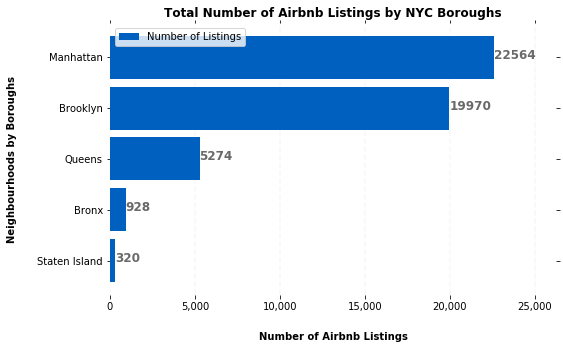

In [54]:
ax = NYC_by_neighbourhoods_group.plot(kind='barh', figsize=(8, 5), color= '#0060c0', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

vals1 = ax.get_xticks()

for tick in vals1:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)   


ax.set_alpha(0.8)   
ax.set_title("Total Number of Airbnb Listings by NYC Boroughs",fontsize=12, fontweight='bold')    
ax.set_xlabel("Number of Airbnb Listings", labelpad=20, weight='bold', size=10)
ax.set_ylabel("Neighbourhoods by Boroughs", labelpad=20, weight='bold', size=10)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
ax.invert_yaxis()

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.6, i.get_y()+.45, \
            str(i.get_width()), fontsize=12,fontweight='bold',
color='dimgrey')
    
# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
    
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')



plt.savefig("Total Number of Airbnb Listings by NYC Boroughs.png")

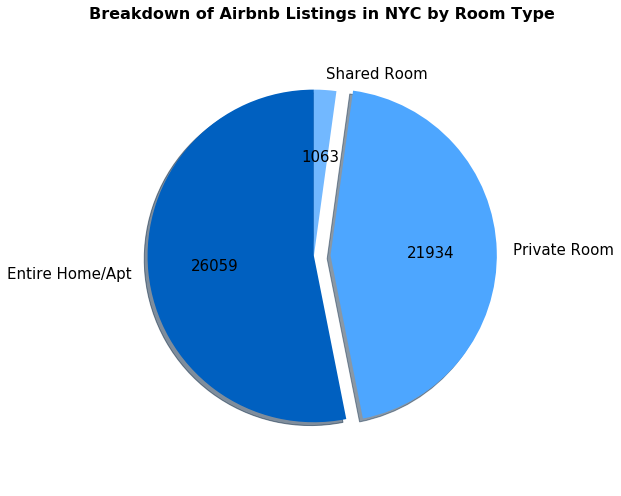

In [55]:
# #room type visualizations 

# matplotlib.style.use('ggplot')

# room = data_complete.room_type
# r = Counter(room)

# room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
# room_df.columns = ['Room Type']
# room_df.plot.pie(y = 'Room Type', 
#                  colormap = 'Blues', 
#                  figsize=(8,10), 
#                  fontsize = 15, autopct = '%11.f%%',
#                  legend = False,
#                  title = 'Airbnb Rentals Listings Distribution by Room Type')

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format


# Pie chart
labels = ['Entire Home/Apt','Private Room', 'Shared Room ']
sizes = [26059,21934, 1063]

colors = ['#0060c0','#4da6ff','#72b8ff']

# only "explode" the 2nd slice 
explode = (0, 0.1, 0)  
fig1, ax1 = plt.subplots(figsize=(8,7))

ax1.pie(sizes, explode=explode, labels=labels, colors = colors, autopct = autopct_format(sizes),
        shadow=True, startangle=90,textprops={'fontsize': 15})

plt.title("Breakdown of Airbnb Listings in NYC by Room Type",fontsize=16,fontweight='bold' )

# Equal aspect ratio ensures that pie is drawn as a circle

#plt.tight_layout(pad=5)
ax1.axis('equal')  
plt.tight_layout()
plt.margins(0.04)


plt.savefig('Breakdown of Airbnb Listings in NYC by Room Type.png')
plt.show()

In [56]:
# room_df.head()

In [57]:
NYC_neighbourhood_total = len(NYC_listing_df['neighbourhood_group_cleansed'].unique())
NYC_neighbourhood_total

5

In [58]:
NYC_neighbourhood_price = NYC_listing_df.groupby(['neighbourhood_group_cleansed']).mean()['price']
NYC_neighbourhood_price.sort_values(ascending=False)

KeyError: 'price'

In [ ]:
NYC_neighbourhoods_grouped = NYC_listing_df.groupby('neighbourhood_group_cleansed').agg({'price': ['mean', 'min','max']})
#NYC_neighbourhoods_grouped.rename(columns={'City': 'Neighbourhood'})
NYC_neighbourhoods_grouped = NYC_neighbourhoods_grouped.reset_index()
NYC_neighbourhoods_grouped.head()

In [ ]:
#get rid of duplicate -Brooklyn
#create a chart summarizing only 5 bouroughs - The Bronx, Brooklyn, Manhattan, Queens, and Staten Island.


In [ ]:
NYC_neighbourhoods_grouped2= NYC_listing_df.groupby(['neighbourhood_group_cleansed','Room Type']).agg({'price': ['mean']})
NYC_neighbourhoods_grouped2 = NYC_neighbourhoods_grouped2.reset_index()
NYC_neighbourhoods_grouped2.head()

In [ ]:
# NYC_sorted_by_mean_df=NYC_neighbourhoods_grouped2.sort_values(('price','mean'),ascending=False)
# NYC_sorted_by_mean_df
NYC_neighbourhoods_grouped2=NYC_neighbourhoods_grouped2.rename(columns={'neighbourhood_group_cleansed': 'Borough'})


NYC_neighbourhoods_grouped2.head()

In [ ]:
NYC_neighbourhoods_grouped2=pd.DataFrame(NYC_neighbourhoods_grouped2)
#NYC_neighbourhoods_grouped2 = NYC_neighbourhoods_grouped2.rename(columns={'City': 'Neighbourhood'})

NYC_neighbourhoods_grouped2

In [ ]:
NY_NY_neighbourhood = NYC_listing_df.loc[NYC_listing_df["neighbourhood_group_cleansed"]=="Manhattan"].groupby(['Room Type'])['price'].mean()
NY_NY_neighbourhood
NY_Brooklyn_neighbourhood = NYC_listing_df.loc[NYC_listing_df["neighbourhood_group_cleansed"]=="Brooklyn"].groupby(['Room Type'])['price'].mean()
NY_Brooklyn_neighbourhood
NY_Queens_neighbourhood = NYC_listing_df.loc[NYC_listing_df["neighbourhood_group_cleansed"]=="Queens"].groupby(['Room Type'])['price'].mean()
NY_Queens_neighbourhood

NY_Staten_neighbourhood = NYC_listing_df.loc[NYC_listing_df["neighbourhood_group_cleansed"]=="Staten Island"].groupby(['Room Type'])['price'].mean()
NY_Staten_neighbourhood

NY_Bronx_neighbourhood = NYC_listing_df.loc[NYC_listing_df["neighbourhood_group_cleansed"]=="Bronx"].groupby(['Room Type'])['price'].mean()
NY_Bronx_neighbourhood

In [ ]:

NY_boroughs_by_avg_price = pd.DataFrame({"Entire home/apt":[242.69,175.50,145.18,174.53,171.58],
                                                 "Private room":[113.89,74.97,76.16,59.78,67.96],
                                                 "Shared room": [88.57,53.67,65.80,52.60,80.30]},
                                                 index=["Manhattan","Brooklyn","Queens","Staten Island",
                                                        "Bronx"])

NY_boroughs_by_avg_price

In [ ]:
NY_boroughs_by_avg_price.plot(kind='barH',figsize=(8, 8), colormap='tab20c', legend=True)

plt.title("NYC Average Airbnb Rental Price by Room Type",fontsize=12, fontweight='bold' )
plt.xlabel("Average Rent Prices", fontsize=11, fontweight='bold')
plt.ylabel("NYC Boroughs", fontsize=11, fontweight='bold')

# x=['Manhattan', 'Brooklyn','Queens','Staten Island','Bronx'];
# vals = [101.80,150.00,131.80,179.12,227.35, 54.71,44.66,75.53,86.37,103.28, 50.00,66.6];



plt.savefig("NYC Average Airbnb Rental Price by Room Type.png")
plt.show()

In [ ]:
#NYC Neighborhood By the Highest Airbnb Average Rental Price
NY_Manhattan_avg_price  = NYC_listing_df.loc[NYC_listing_df["neighbourhood_group_cleansed"]=="Manhattan"].mean()['price']
NY_Manhattan_avg_price

NY_Brooklyn_avg_price = NYC_listing_df.loc[NYC_listing_df["neighbourhood_group_cleansed"]=="Brooklyn"].mean()['price']
NY_Brooklyn_avg_price


NY_Queens_avg_price = NYC_listing_df.loc[NYC_listing_df["neighbourhood_group_cleansed"]=='Queens'].mean()['price']
NY_Queens_avg_price 

NY_Staten_avg_price = NYC_listing_df.loc[NYC_listing_df["neighbourhood_group_cleansed"]=='Staten Island'].mean()['price']
NY_Staten_avg_price 


NY_Bronx_avg_price = NYC_listing_df.loc[NYC_listing_df["neighbourhood_group_cleansed"]=="Bronx"].mean()['price']
NY_Bronx_avg_price 

In [34]:
NYC_borough_by_avg_price = pd.DataFrame({"Average Airbnb Rental Price":[193.90, 122.60,110.95,101.39,85.24]}, 
                                                   index=["Manhattan","Brooklyn","Queens",
                                                        "Staten Island","Bronx"])
NYC_borough_by_avg_price

,Average Airbnb Rental Price
Manhattan,193.90
Brooklyn,122.60
Queens,110.95
Staten Island,101.39
Bronx,85.24


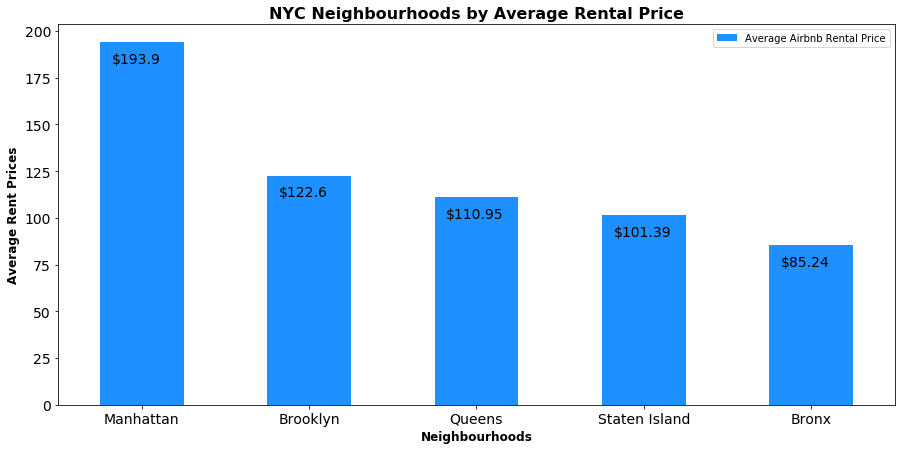

In [35]:

ax = NYC_borough_by_avg_price.plot.bar(rot=0,figsize=(15,7), fontsize=14, color='dodgerblue')
#ax.set_alpha(0.8)
plt.title("NYC Neighbourhoods by Average Rental Price",color = 'black', fontsize=16, fontweight='bold' )
plt.xlabel('Neighbourhoods', fontsize=12,fontweight='bold')
plt.ylabel("Average Rent Prices", fontsize=12, fontweight='bold')

# totals = []

# # find the values and append to list
# for i in ax.patches:
#     totals.append(i.get_height())

# # set individual bar lables using above list
# total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.07, i.get_height()-11, \
            '$'+ str(i.get_height()), fontsize=14,
                color='black')

# Save the Figure
plt.savefig("NYC Boroughs by Highest Average Rental Price.png")

# Show the Figure
plt.show()


#plt.legend(labels=five_SF_neighbourhoods_df, loc='upper right')
#add bar text labels
#make bars blue